# 고전 머신러닝 - 이진분류

만들어놓은 모델을 불러와서 이진분류 학습을 시켜보자.

In [1]:
from data_control import *
from mycode import *

model = Model()
data = MyData()
plot = MyPlot()
optim = MyOptim(model)

data.get_data()
x_train, x_test = data.one_hot_encode()
y_train, y_test = data.label_to_int()
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1, 1)
print(x_train.shape, y_train.shape)



(125973, 84) (125973, 1)


작동 시키면 loss값이 정상적으로 줄어드는것을 확인 할 수 있다.

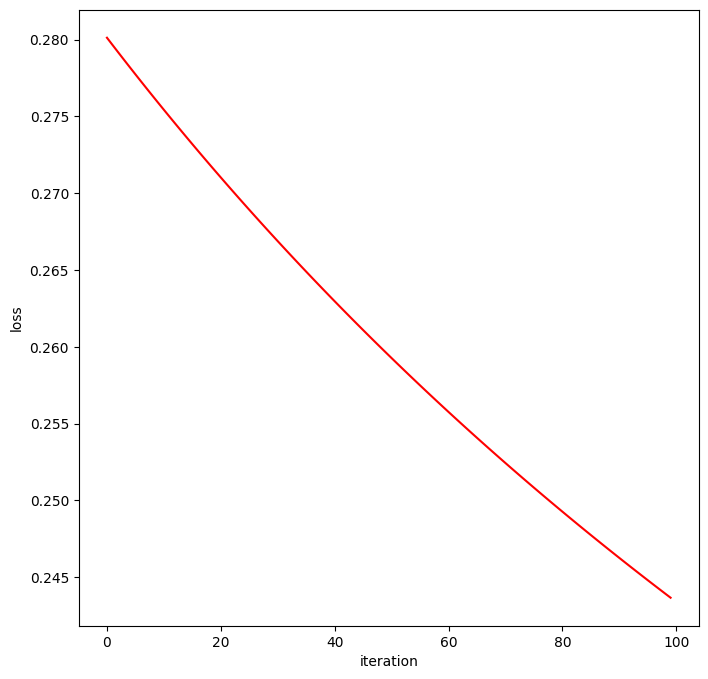

In [8]:
loss_list = []

for i in range(100):
    pred = model.predict(x_train)
    loss = optim.compute_loss(y_train, pred)
    grad = optim.compute_gradient(x_train, y_train, pred)
    optim.step(grad)
    loss_list.append(float(loss.values[0][0]))

plot.plot_loss(loss_list)


이제 학습시킨 가중치를 가지고 테스트에 잘 작동하는지 확인해보자!

In [9]:
x_test.shape, y_test.shape

test_pred = model.predict(x_test)
test_pred_class = (test_pred >= 0.5).astype(int)

correct = (test_pred_class.to_numpy().flatten() == y_test.flatten()).sum()
total = len(y_test)

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7370
